In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
#reading csv data from the file. I downloaded the file and placed it in my pwd
# please use the dataset from the url 'https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_' 
 
df=pd.read_csv('data.csv')
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [3]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

# a. Measure the dispersion

In [4]:
# a. Measure the dispersion
dispersion_before = df[' Blood Pressure Before (mmHg)'].max() - df[' Blood Pressure Before (mmHg)'].min()
dispersion_after = df[' Blood Pressure After (mmHg)'].max() - df[' Blood Pressure After (mmHg)'].min()

iqr_before = df[' Blood Pressure Before (mmHg)'].quantile(0.75) - df[' Blood Pressure Before (mmHg)'].quantile(0.25)
iqr_after = df[' Blood Pressure After (mmHg)'].quantile(0.75) - df[' Blood Pressure After (mmHg)'].quantile(0.25)

range_before = df[' Blood Pressure Before (mmHg)'].max() - df[' Blood Pressure Before (mmHg)'].min()
range_after = df[' Blood Pressure After (mmHg)'].max() - df[' Blood Pressure After (mmHg)'].min()

variance_before = df[' Blood Pressure Before (mmHg)'].var()
variance_after = df[' Blood Pressure After (mmHg)'].var()

std_before = df[' Blood Pressure Before (mmHg)'].std()
std_after = df[' Blood Pressure After (mmHg)'].std()

print("Dispersion in 'Blood Pressure Before':", dispersion_before)
print("Dispersion in 'Blood Pressure After':", dispersion_after)
print("IQR of 'Blood Pressure Before':", iqr_before)
print("IQR of 'Blood Pressure After':", iqr_after)
print("Range of 'Blood Pressure Before':", range_before)
print("Range of 'Blood Pressure After':", range_after)
print("Variance of 'Blood Pressure Before':", variance_before)
print("Variance of 'Blood Pressure After':", variance_after)
print("Standard Deviation of 'Blood Pressure Before':", std_before)
print("Standard Deviation of 'Blood Pressure After':", std_after)

Dispersion in 'Blood Pressure Before': 28
Dispersion in 'Blood Pressure After': 23
IQR of 'Blood Pressure Before': 11.25
IQR of 'Blood Pressure After': 12.0
Range of 'Blood Pressure Before': 28
Range of 'Blood Pressure After': 23
Variance of 'Blood Pressure Before': 43.53727272727272
Variance of 'Blood Pressure After': 47.44484848484848
Standard Deviation of 'Blood Pressure Before': 6.598278012275076
Standard Deviation of 'Blood Pressure After': 6.888022102523226


# b. Calculate mean and 5% confidence interval and plot it in a graph


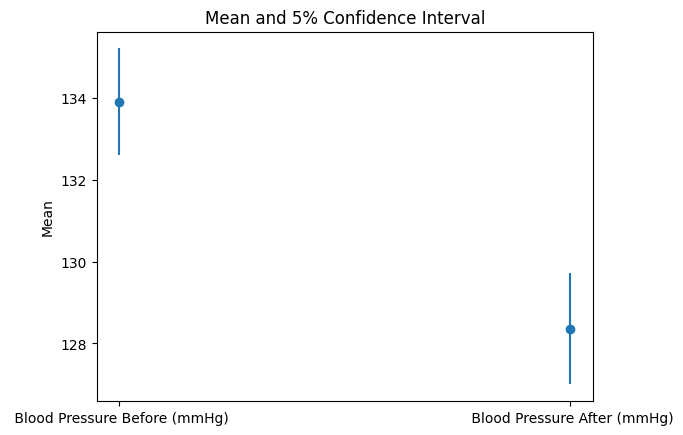

In [8]:
# b. Calculate mean and 5% confidence interval and plot it in a graph
mean_before = df[' Blood Pressure Before (mmHg)'].mean()
mean_after = df[' Blood Pressure After (mmHg)'].mean()

confidence_interval_before = stats.t.interval(0.95, len(df[' Blood Pressure Before (mmHg)']) - 1, loc=mean_before, scale=stats.sem(df[' Blood Pressure Before (mmHg)']))
confidence_interval_after = stats.t.interval(0.95, len(df[' Blood Pressure After (mmHg)']) - 1, loc=mean_after, scale=stats.sem(df[' Blood Pressure After (mmHg)']))

plt.errorbar([1, 2], [mean_before, mean_after], yerr=[mean_before-confidence_interval_before[0], mean_after-confidence_interval_after[0]], fmt='o')
plt.xticks([1, 2], [' Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)'])
plt.ylabel('Mean')
plt.title('Mean and 5% Confidence Interval')
plt.show()


# c. Calculate Mean Absolute Deviation (MAD) and Standard Deviation (SD)


In [9]:
# c. Calculate Mean Absolute Deviation (MAD) and Standard Deviation (SD)
mad_before = np.abs(df[' Blood Pressure Before (mmHg)'] - mean_before).mean()
mad_after = np.abs(df[' Blood Pressure After (mmHg)'] - mean_after).mean()

sd_before = df[' Blood Pressure Before (mmHg)'].std()
sd_after = df[' Blood Pressure After (mmHg)'].std()

print("Mean Absolute Deviation (MAD) of 'Blood Pressure Before':", mad_before)
print("Mean Absolute Deviation (MAD) of 'Blood Pressure After':", mad_after)
print("Standard Deviation (SD) of 'Blood Pressure Before':", sd_before)
print("Standard Deviation (SD) of 'Blood Pressure After':", sd_after)


Mean Absolute Deviation (MAD) of 'Blood Pressure Before': 5.7118
Mean Absolute Deviation (MAD) of 'Blood Pressure After': 5.9
Standard Deviation (SD) of 'Blood Pressure Before': 6.598278012275076
Standard Deviation (SD) of 'Blood Pressure After': 6.888022102523226


#d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [12]:
correlation = df[' Blood Pressure Before (mmHg)'].corr(df[' Blood Pressure After (mmHg)'])
print("Correlation between 'Blood Pressure Before' and 'Blood Pressure After' is :", correlation)

Correlation between 'Blood Pressure Before' and 'Blood Pressure After' is : 0.9779485966556016
